In [ ]:
# Check the probabilities for correctness 
import pandas as pd


data = pd.read_csv("lung-cancer-dataset/dataset.csv")

data["GENDER"] = data["GENDER"].map({"M": 1, "F": 2})
data["LUNG_CANCER"] = data["LUNG_CANCER"].map({"YES": 1, "NO": 2})
data.iloc[:, 2:-1] = data.iloc[:, 2:-1] - 1

data_cancer = data[data["LUNG_CANCER"] == 1]
data_no_cancer = data[data["LUNG_CANCER"] == 2]

# only people with lung cancer
data = data[data["LUNG_CANCER"] == 1]

bins = [30, 40, 50, 60, 70, 80, 90]
labels = ["30-39", "40-49", "50-59", "60-69", "70-79", "80-89"]
data["AgeGroup"] = pd.cut(data["AGE"], bins=bins, labels=labels, right=False)

symptoms = ["SMOKING", "YELLOW_FINGERS", "ANXIETY", "CHRONIC_DISEASE",
                   "FATIGUE", "ALLERGY", "WHEEZING", "ALCOHOL_CONSUMING",
                   "COUGHING", "SHORTNESS_OF_BREATH", "SWALLOWING_DIFFICULTY", "CHEST_PAIN"]

probabilities = data.groupby("AgeGroup")[symptoms].mean()

print(probabilities)

           SMOKING  YELLOW_FINGERS   ANXIETY  CHRONIC_DISEASE   FATIGUE  \
AgeGroup                                                                  
30-39     0.510836        0.529412  0.448916         0.551084  0.489164   
40-49     0.482993        0.448980  0.465986         0.510204  0.489796   
50-59     0.513699        0.513699  0.510274         0.527397  0.500000   
60-69     0.539007        0.553191  0.528369         0.503546  0.500000   
70-79     0.467577        0.549488  0.498294         0.430034  0.464164   
80-89     0.294118        0.588235  0.382353         0.470588  0.588235   

           ALLERGY  WHEEZING  ALCOHOL_CONSUMING  COUGHING  \
AgeGroup                                                    
30-39     0.479876  0.523220           0.476780  0.479876   
40-49     0.551020  0.469388           0.493197  0.513605   
50-59     0.486301  0.486301           0.479452  0.571918   
60-69     0.471631  0.443262           0.407801  0.542553   
70-79     0.546075  0.457338     

C:\Users\DELL\AppData\Local\Temp\ipykernel_5132\4051449992.py:25: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [6]:
probabilities.to_csv("radarchart/radarchart_data.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_5132\3440599827.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = data.groupby("AgeGroup")[symptoms].mean()
C:\Users\DELL\AppData\Local\Temp\ipykernel_5132\3440599827.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("RdYlGn")  # Red-Yellow-Green colormap


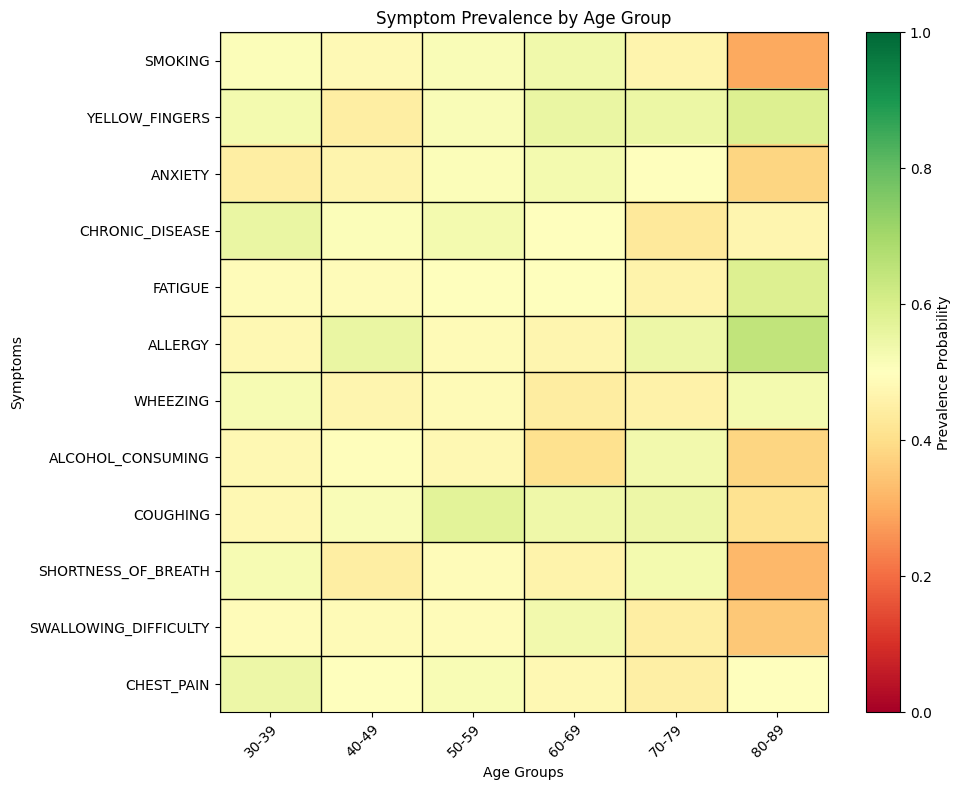

In [2]:
import matplotlib.pyplot as plt
import numpy as np

heatmap_data = data.groupby("AgeGroup")[symptoms].mean()

fig, ax = plt.subplots(figsize=(10, 8))

cmap = plt.cm.get_cmap("RdYlGn")  # Red-Yellow-Green colormap

cax = ax.imshow(heatmap_data.T, cmap=cmap, vmin=0, vmax=1, aspect="auto")

cbar = fig.colorbar(cax)
cbar.set_label("Prevalence Probability")

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(symptoms)))
ax.set_xticklabels(labels)
ax.set_yticklabels(symptoms)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

ax.set_xlabel("Age Groups")
ax.set_ylabel("Symptoms")
ax.set_title("Symptom Prevalence by Age Group")

ax.set_xticks(np.arange(len(labels)) - 0.5, minor=True)
ax.set_yticks(np.arange(len(symptoms)) - 0.5, minor=True)
ax.grid(which="minor", color="black", linestyle="-", linewidth=1)
ax.tick_params(which="minor", bottom=False, left=False)

plt.tight_layout()
plt.show()

In [4]:
import plotly.express as px

#each symptom in each age group will be performed as a string with probability
probability_data = probabilities.reset_index().melt(id_vars=["AgeGroup"], value_vars=symptoms,
                                                    var_name="symptom", value_name="probability")

fig = px.scatter(probability_data, x="symptom", y="probability",
                 color="AgeGroup", size_max=10, hover_data=['symptom', 'AgeGroup', 'probability'],
                 title="Symptom Probability by Age Group",
                 labels={'probability': 'Probability of Symptom', 'AgeGroup': 'Age Group'})

fig.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_5132\252707352.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



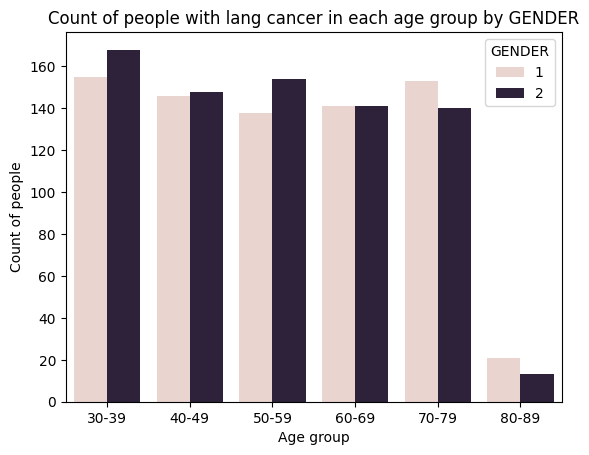

In [ ]:
import seaborn as sns

age_gender_count = data.groupby(["GENDER", "AgeGroup"]).size().reset_index(name="Count")

sns.barplot(x="AgeGroup", y="Count", hue="GENDER", data=age_gender_count)

plt.title("Count of people with lang cancer in each age group by GENDER")
plt.xlabel("Age group")
plt.ylabel("Count of people")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5132\98902196.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




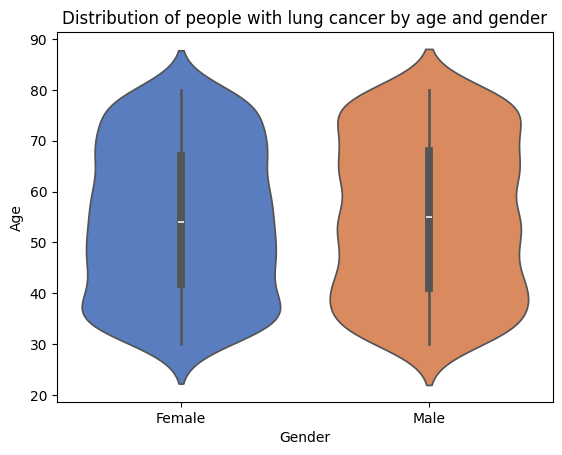

In [ ]:
# Violin matplotlib plot for distributing people with lung cancer by age and gender
data["GENDER"] = data["GENDER"].map({1: "Male", 2: "Female"})
sns.violinplot(x="GENDER", y="AGE", data=data, palette="muted")

plt.title("Distribution of people with lung cancer by age and gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()

In [7]:
import seaborn as sns
from bokeh.plotting import figure, show, output_notebook
from bokeh.io import push_notebook
from bokeh.models import ColumnDataSource
import bokeh.palettes as bp

In [18]:
# Age Distribution using bokeh
output_notebook()

hist, edges = np.histogram(data['AGE'], bins=10)

p = figure(title="Age Distribution of Lung Cancer Patients",
           x_axis_label="Age", y_axis_label="Count",
           width=700, height=400)

p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
       fill_color="orange", line_color="black")

show(p, notebook_handle=True)

Loading BokehJS ...

In [ ]:
# Symptom Prevalence Bar Chart using bokeh
symptom_counts = data[symptoms].sum().sort_values(ascending=False)
source = ColumnDataSource(data=dict(symptoms=symptom_counts.index, counts=symptom_counts.values))

p = figure(y_range=symptom_counts.index.tolist(), x_axis_label="Count", 
           title="Prevalence of Symptoms Among Lung Cancer Patients",
           width=700, height=500, toolbar_location=None)

p.hbar(y="symptoms", right="counts", source=source, height=0.4, color="pink")

show(p, notebook_handle=True)

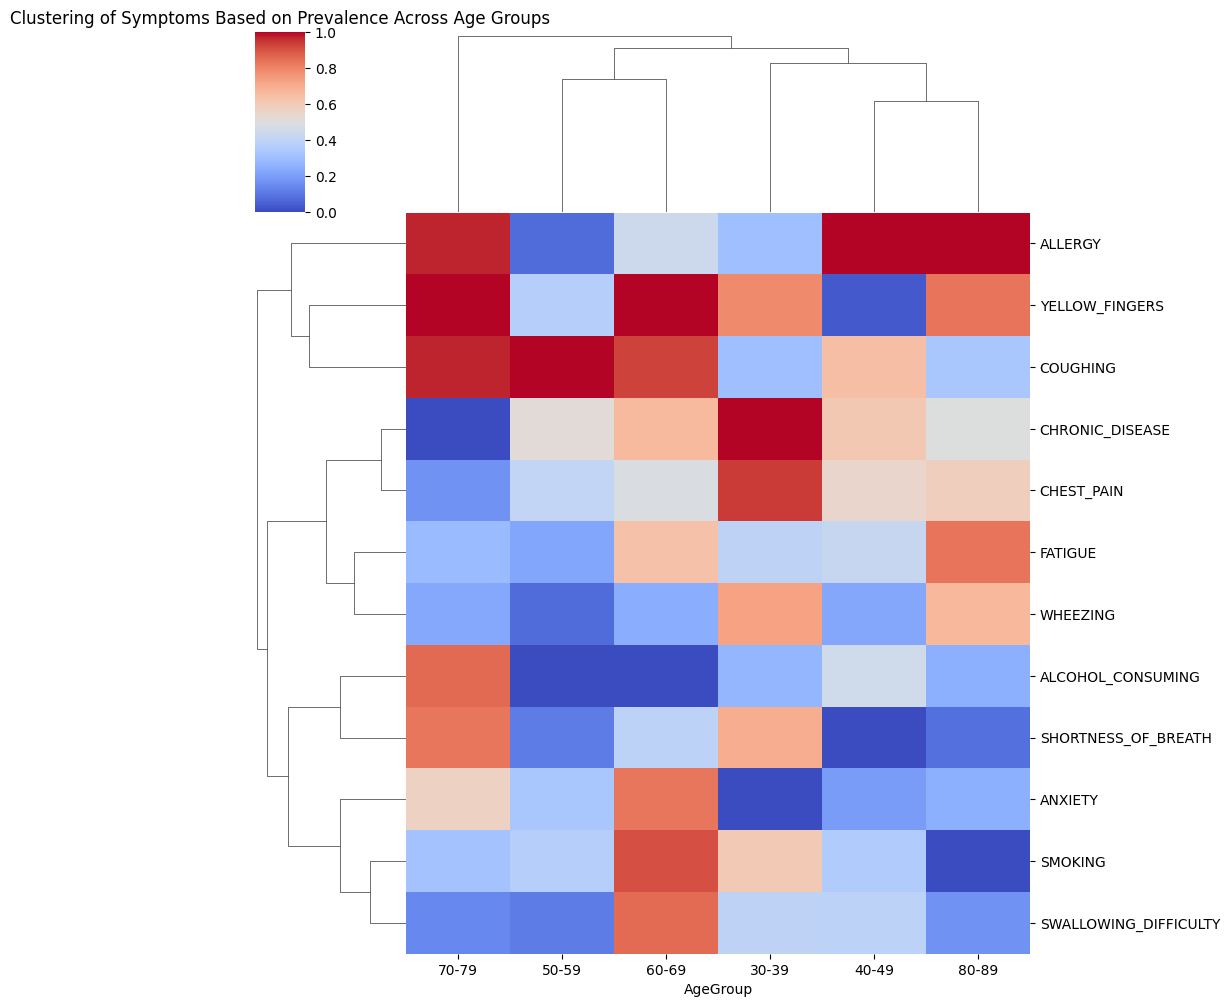

In [ ]:
# Seaborn Clustered Heatmap to group symptoms by correlation in agegroups
sns.clustermap(probabilities.T, cmap="coolwarm", standard_scale=1, method='ward')
plt.title("Clustering of Symptoms Based on Prevalence Across Age Groups")
plt.show()

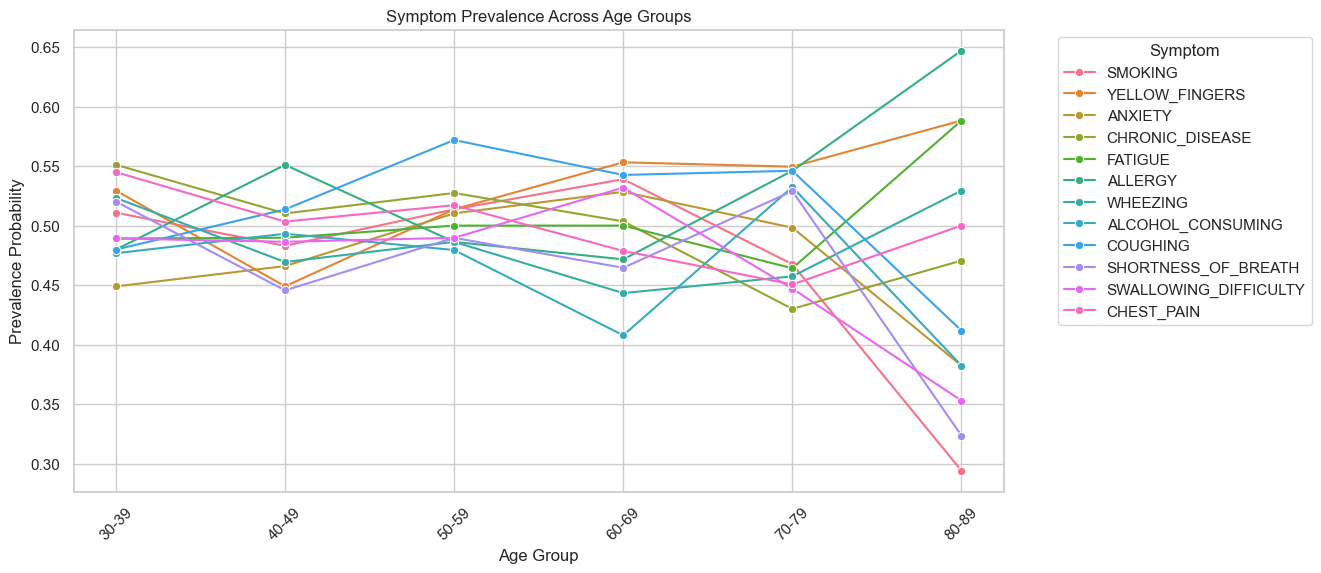

In [ ]:
# Seaborn Line Plot for Symptom Prevalence Across Age Groups
sns.set_theme(style="whitegrid")

# tranform data so that x-axis represents "AgeGroup" and the y-axis represents "Prevalence"
# or making long format
probability_data = probabilities.reset_index().melt(id_vars=["AgeGroup"], value_vars=symptoms,
                                                    var_name="Symptom", value_name="Prevalence")
plt.figure(figsize=(12, 6))
sns.lineplot(data=probability_data, x="AgeGroup", y="Prevalence", hue="Symptom", marker="o")
plt.title("Symptom Prevalence Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Prevalence Probability")
plt.xticks(rotation=45)
plt.legend(title="Symptom", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


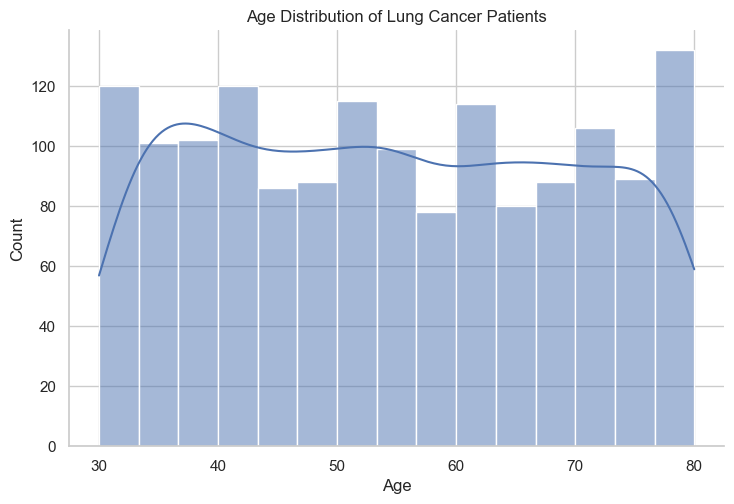

In [33]:
# Seaborn Displot for Age Distribution
sns.displot(data, x="AGE", kde=True, bins=15, aspect=1.5)
plt.title("Age Distribution of Lung Cancer Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [54]:
from bokeh.models import HoverTool, AnnularWedge, Legend, LegendItem, Range1d
from math import pi

In [ ]:
# Count symptom occurrences
def scale_counts(counts, scale_factor=700): #scaling for better visualizations
    return counts - scale_factor

cancer_counts = scale_counts((data_cancer[symptoms]).sum())
no_cancer_counts = scale_counts((data_no_cancer[symptoms]).sum())


def create_donut_plot(title, symptom_counts):
    xdr = Range1d(start=-2, end=2)
    ydr = Range1d(start=-2, end=2)
    
    plot = figure(x_range=xdr, y_range=ydr, title=title, toolbar_location=None)
    
    total = symptom_counts.sum()
    angles = (symptom_counts / total) * 2 * pi
    cumulative_angles = angles.cumsum()
    start_angles = [0] + list(cumulative_angles[:-1])
    end_angles = list(cumulative_angles)
    colors = bp.Category20[len(symptom_counts)]
    
    source = ColumnDataSource(dict(
        start=start_angles,
        end=end_angles,
        colors=colors[:len(symptom_counts)],
        symptom=symptom_counts.index,
        count=symptom_counts.values
    ))
    
    glyph = AnnularWedge(x=0, y=0, inner_radius=0.9, outer_radius=1.8,
                         start_angle="start", end_angle="end",
                         line_color="white", line_width=2, fill_color="colors")
    r = plot.add_glyph(source, glyph)
    
    legend = Legend(items=[LegendItem(label=symptom, renderers=[r], index=i)
                           for i, symptom in enumerate(symptom_counts.index)])
    plot.add_layout(legend, "right")
    
    return plot

p1 = create_donut_plot("Symptom Prevalence (Lung Cancer Patients)", cancer_counts)
p2 = create_donut_plot("Symptom Prevalence (No Lung Cancer)", no_cancer_counts)

show(p1)
show(p2)
